## Model Training with Cross Validation Using Lasso Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [7]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.drop(['Unnamed: 0', 'day', 'month', 'year'], inplace=True, axis=1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [13]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [14]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [15]:
## Independent and Dependent Features
X = df.drop('FWI', axis=1)
y = df['FWI']

In [16]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [17]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
## Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


Multicollinearity: Multicollinearity is a situation in which two or more independent variables in a multiple regression model are highly correlated, which can cause problems in the model's predictions and interpretation. In other words, multicollinearity occurs when there is a strong relationship between two or more independent variables in a regression model, which can lead to unstable and unstable results. If two or more independent variables are highly correlated, then the model may not be able to distinguish between the relationships between the variables and may not be able to make accurate predictions.

So if two features are highly correlated, then change in one feature will affect the other feature. This is called multicollinearity.

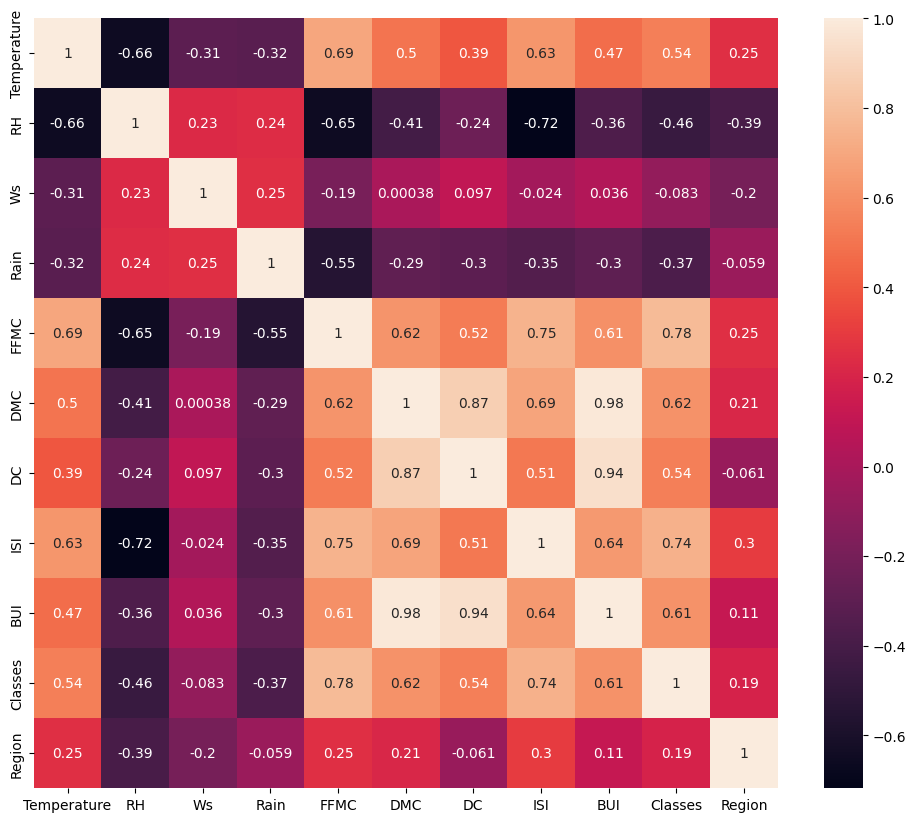

In [20]:
## Check for Multicollinearity
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
## threshold-Domain Expertise
corr_features = correlation(X_train, 0.85)

In [23]:
corr_features

{'BUI', 'DC'}

In [24]:
## drop features when correlation is greater than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

### Box Plots to understand the Effect of Standard Scaler

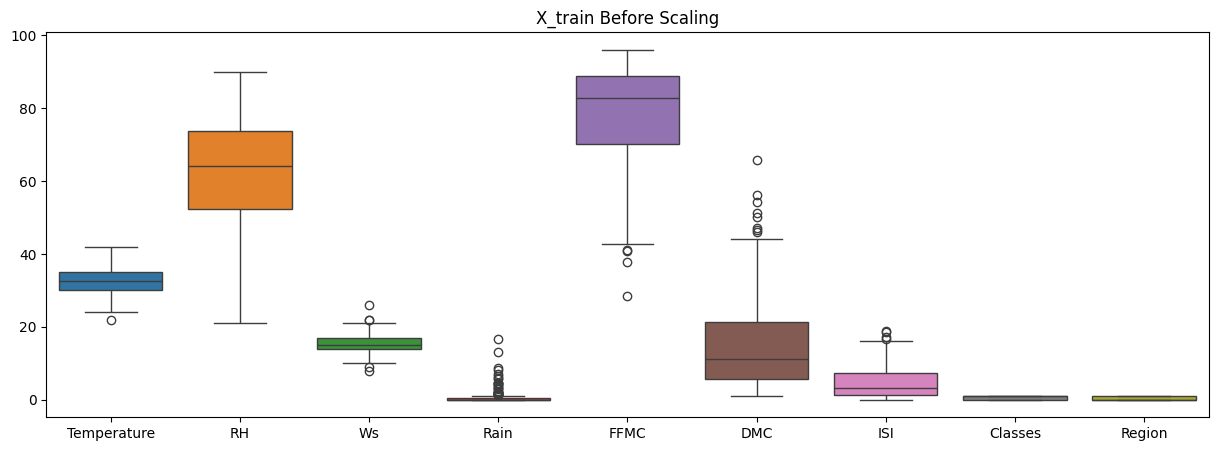

In [27]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.show()

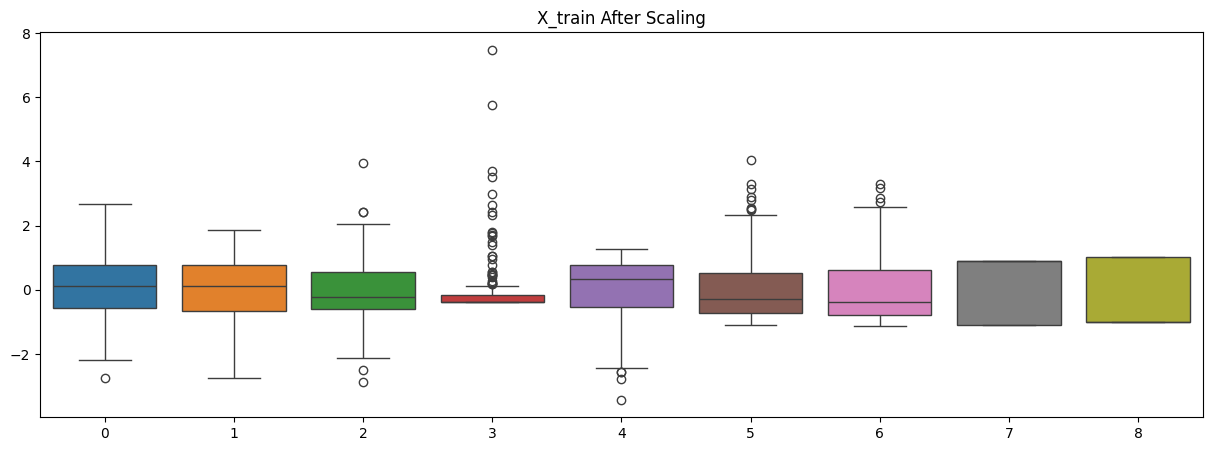

In [28]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

## Linear Regression Model

Mean Absolute Error: 0.5468236465249986
R2 Score: 0.9847657384266951


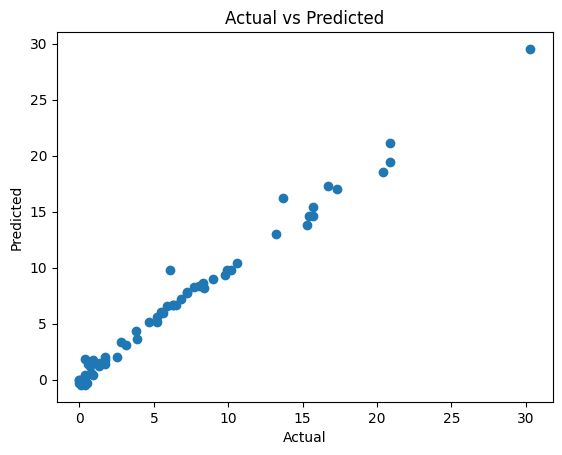

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Lasso Regression Model

Mean Absolute Error: 1.133175994914409
R2 Score: 0.9492020263112388


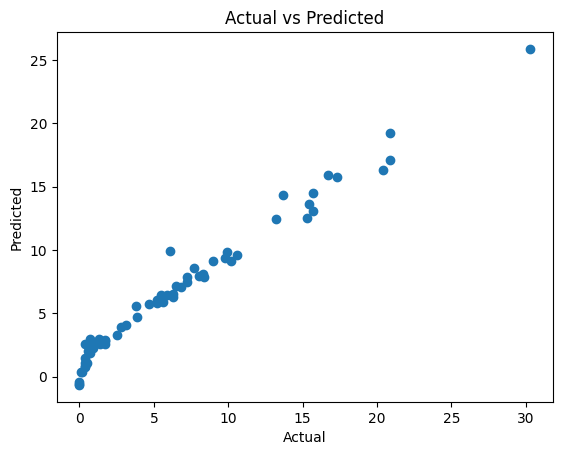

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Cross Validation Lasso

In [31]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [32]:
lassocv.alpha_

np.float64(0.05725391318234408)

Mean Absolute Error: 0.619970115826343
R2 Score: 0.9820946715928275


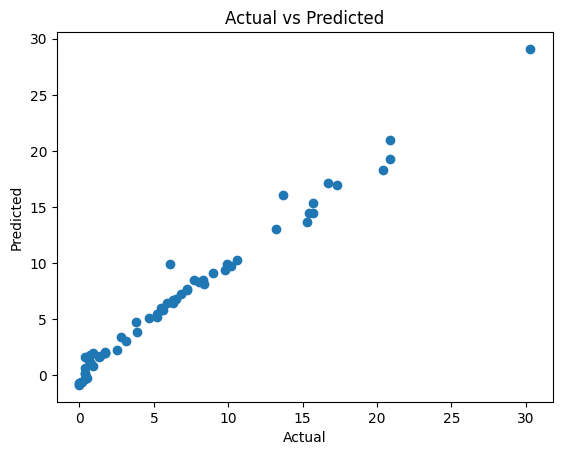

In [33]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Ridge Regression Model

Mean Absolute Error: 0.5642305340105692
R2 Score: 0.9842993364555513


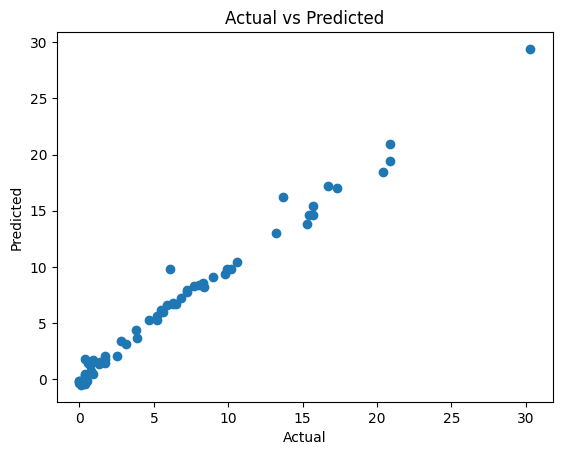

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Cross Validation Ridge

Mean Absolute Error: 0.5642305340105692
R2 Score: 0.9842993364555513


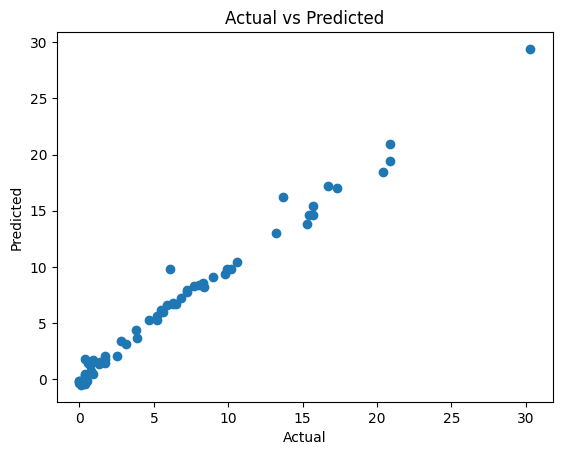

In [35]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print("R2 Score:", score)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [36]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## ElasticNet Regression Model

Mean Absolute Error: 1.8822353634896005
R2 Score: 0.8753460589519703


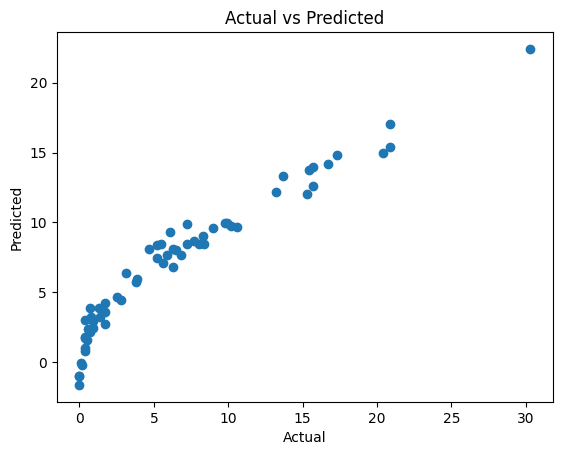

In [37]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Cross Validation ElasticNet

Mean Absolute Error: 0.6575946731430898
R2 Score: 0.9814217587854941


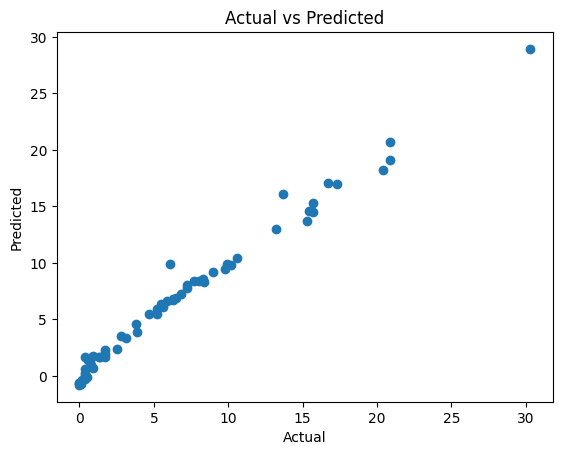

In [38]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Pickle the machine learning model, preprocessing model (StandardScaler)

In [39]:
scaler

StandardScaler()

In [40]:
ridge

Ridge()

In [41]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))